# Laboratorio 10

En este laboratorio, seguimos explorando RNN con otros datos

In [1]:
# Librerías
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM
from tensorflow.keras.utils import to_categorical
import pandas as pd
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Datos

Este conjunto de datos consta de aproximadamente 20.000 documentos de grupos de noticias que se clasifican en 20 grupos de noticias o temas diferentes. Cada documento representa una publicación de un grupo de noticias, que es esencialmente un foro de discusión sobre un tema en particular.

Categorías:
* Comp (ordenadores): comp.graphics, comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware
* Rec (recreación): rec.autos, rec.motorcycles, rec.sport.baseball, rec.sport.hockey
* Sci (ciencia): sci.crypt, sci.electronics, sci.med, sci.space
* Talk (discusión): talk.politics.guns, talk.politics.mideast, talk.politics.misc, talk.religion.misc
* Y otros como alt.atheism, misc.forsale y soc.religion.christian

In [5]:
# Load dataset
newsgroups_data = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))
texts = newsgroups_data.data
labels = newsgroups_data.target
labels_names = newsgroups_data.target_names

# Inspección de unas cuantas observaciones
for i in range(5):
  print(f"Texto {i+1}:\n{texts[i]}\n")
  print(f"Etiqueta {i+1}: {labels_names[labels[i]]}\n")

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Texto 1:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey a

Gráfico de número de observaciones por clase

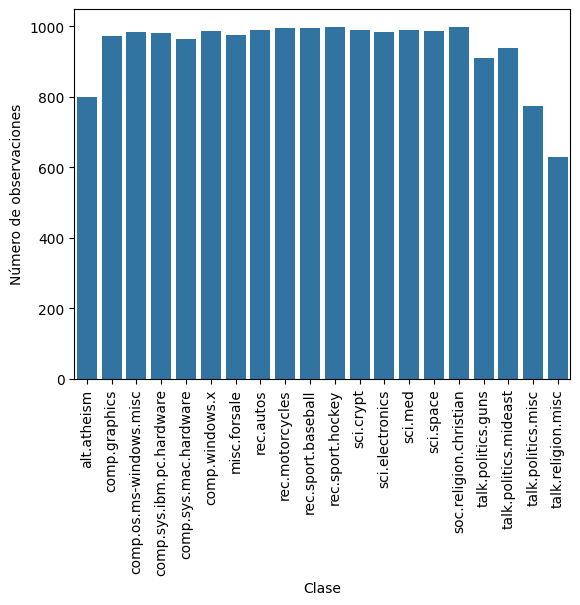

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
obs_df = pd.Series(labels).value_counts().reset_index().sort_values(by='index')
obs_df['clase'] = obs_df['index'].apply(lambda x: labels_names[x])
obs_df
sns.barplot(data=obs_df, x='clase', y='count')
plt.xticks(rotation=90)
plt.ylabel("Número de observaciones")
plt.xlabel("Clase")
plt.show()

# Preparación

In [11]:
# Separación de sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=1234, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1234, stratify=y_test)

print(len(y_train), len(y_val), len(y_test))

13192 2827 2827


In [12]:
# Codificación de clases
num_classes = len(np.unique(y_train))

y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
# Tokenización
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Dejar 5 observaciones de test como estan para analizarlas con LIME
X_test_bu = X_test[:5]


# Tokenizar
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)


X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
X_val = pad_sequences(X_val, maxlen=max_len)

print(X_test.shape)

(2827, 200)


# Arquitectura

In [14]:
# Modelo
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Entrenamiento

In [ ]:
# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 139s 325ms/step - accuracy: 0.0746 - loss: 2.9063 - val_accuracy: 0.1744 - val_loss: 2.4436
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 137s 314ms/step - accuracy: 0.2044 - loss: 2.2967 - val_accuracy: 0.2614 - val_loss: 2.2269
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 144s 318ms/step - accuracy: 0.3176 - loss: 1.9318 - val_accuracy: 0.3180 - val_loss: 1.9375
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 130s 315ms/step - accuracy: 0.3987 - loss: 1.6654 - val_accuracy: 0.3693 - val_loss: 1.8877
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 131s 318ms/step - accuracy: 0.4876 - loss: 1.4324 - val_accuracy: 0.4227 - val_loss: 1.8187
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 129s 313ms/step - accuracy: 0.5720 - loss: 1.2433 - val_accuracy: 0.4690 - val_loss: 1.7379
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 144s 318ms/step - accuracy: 0.6167 - loss: 1.1080 - val_accuracy: 0.4782 - val_loss: 1.7695
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 130s 314ms/step - accuracy: 0.6716 -

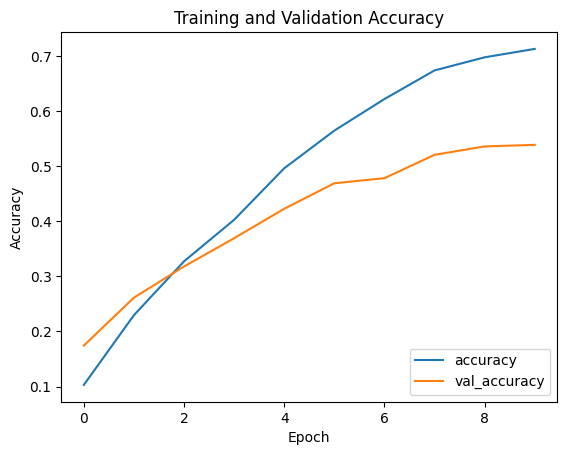

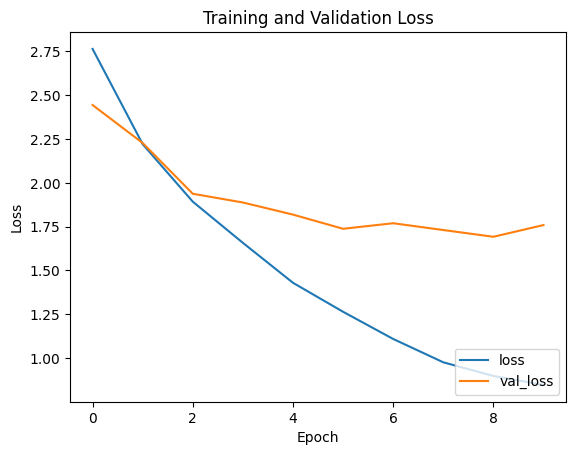

In [ ]:
# Gráficos de entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='lower right')
plt.show()

# Evaluación

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f} and Loss {loss:.4f}")


Test Accuracy: 0.5331 and Loss 1.8162


89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step


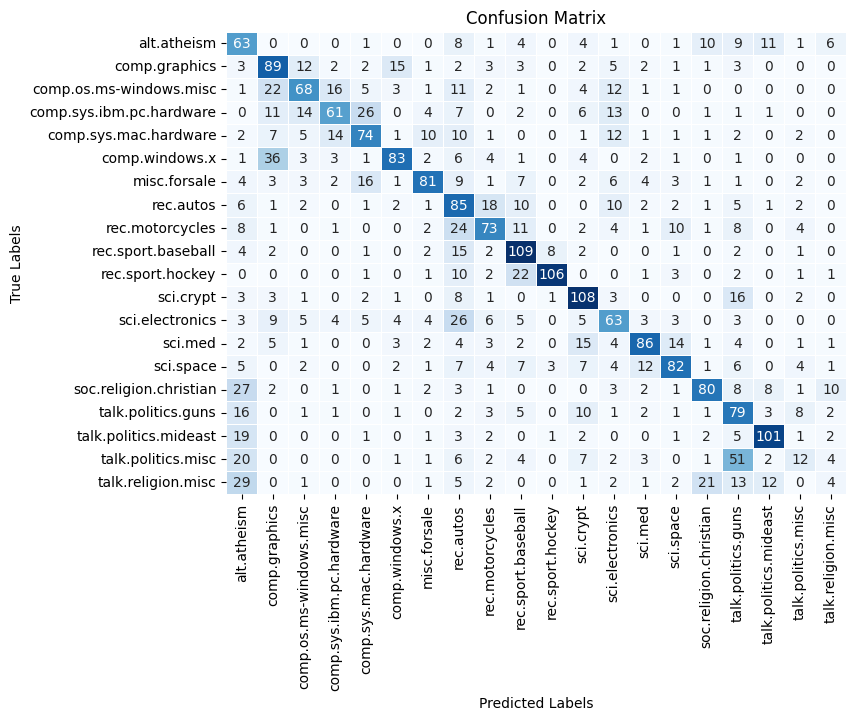

In [ ]:
# Matriz
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_m = np.argmax(y_test, axis=1)
# Compute confusion matrix
cm = confusion_matrix(y_test_m, y_pred)

# Create a heatmap with blue color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False, xticklabels=labels_names, yticklabels=labels_names)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


# Show the plot
plt.show()


In [ ]:
# Reporte
print(classification_report(y_test_m, y_pred, target_names=labels_names))


                          precision    recall  f1-score   support

             alt.atheism       0.29      0.53      0.38       120
           comp.graphics       0.47      0.61      0.53       146
 comp.os.ms-windows.misc       0.58      0.46      0.51       148
comp.sys.ibm.pc.hardware       0.58      0.41      0.48       147
   comp.sys.mac.hardware       0.54      0.51      0.53       144
          comp.windows.x       0.70      0.56      0.62       148
            misc.forsale       0.69      0.55      0.62       146
               rec.autos       0.34      0.57      0.42       149
         rec.motorcycles       0.56      0.49      0.52       150
      rec.sport.baseball       0.56      0.73      0.64       149
        rec.sport.hockey       0.89      0.71      0.79       150
               sci.crypt       0.59      0.72      0.65       149
         sci.electronics       0.43      0.43      0.43       148
                 sci.med       0.70      0.58      0.63       148
         

# Interpretabilidad

In [ ]:
!pip install lime

In [ ]:
from lime.lime_text import LimeTextExplainer

# Define the function to predict probabilities for raw text inputs
def predict_proba(text):
  if type(text) != list:
    text = [text]
  text = tokenizer.texts_to_sequences(text)
  text = pad_sequences(text, maxlen=max_len)
  # Return model's probability predictions
  return model.predict(text)

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=labels_names)


# Select an instance to explain - 5 max saved before
for i in range(2):
  text_to_explain = X_test_bu[i]
  labels_temp = np.argmax(predict_proba(text_to_explain))
  print(f"Texto {i+1}:\n{text_to_explain}\n")
  print(f"Etiqueta {i+1}: {labels_names[y_test[i].argmax()]}\n")
  print(f"Predicción: {i+1}: {labels_names[labels_temp]}\n")
  # Generate the explanation
  explanation = explainer.explain_instance(
      text_to_explain,
      predict_proba,
      num_features=10,  # Number of features to show in explanation
      top_labels=2
  )
  # Display the explanation
  explanation.show_in_notebook(text=True)


Output hidden; open in https://colab.research.google.com to view.